# Clare Neal HDS 5210 Final Project: Food Security for Students

### This project aims to look at food security and determine is there are certain demogrpahics that impact that. I used two data sources for this project that I will list below. The Health Behavior in School Aged Children was conducted from 2005-2006, so I matched the data from the CDC to that same year range.

#### CDC National Health and Nutrition Examination Survery
        Demographics
           Documentation:https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/DEMO_D.htm
            Data: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Demographics&CycleBeginYear=2005
                File Name:'DEMO_D.XPT'
       Food Security
             Documentation: https://wwwn.cdc.gov/Nchs/Nhanes/2005-2006/FSQ_D.htm
            Data: https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Questionnaire&CycleBeginYear=2005
               File Name:'FSQ_D.XPT'
#### Health Behavior in School-Aged Children
        Student Survery
            Documentation/ Data are found on the same page: https://www.icpsr.umich.edu/web/ICPSR/studies/28241/datadocumentation#
                 File Name: '28241-0001-Data.tsv'
         School Administrator Survey
            Documentation/ Data are found on the same page:https://www.icpsr.umich.edu/web/ICPSR/studies/28241/datadocumentation#
                 File Name: '28241-0002-Data.tsv'
          
##### I have saved all of my filed to the /final directory so you can refer to them if needed          
   

In [2]:
# Import Packages and read in data
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype

# Read in tsv files from HBSC data

HBSC = pd.read_csv('28241-0001-Data.tsv', sep = '\t')
HBSC2 = pd.read_csv('28241-0002-Data.tsv', sep = '\t')

# Read in food security and demogrphic files

demographics=pd.read_sas('DEMO_D.XPT')
food_security=pd.read_sas ('FSQ_D.XPT')

In [3]:
## here i am calling the HBSC data table so I can visualize it
HBSC

,CASEID,CLASS_ID,SCHL_ID,SCHL_PSU,DIST_ID,DIVISION,STU_WT,SCHL_WT,DIST_WT,GR6FORM,...,Q78C,Q78_COMP,Q79_1,Q79_2,Q79_3,Q79_4,Q80_1,Q80_2,Q80_3,Q80_4
0,1,1,101,5,3162,4,520.640446,10.828789,337.405187,-8,...,1,2,1,9,-8,4,1,11,-8,5
1,2,2,38,5,9041,8,1245.314261,18.970073,126.211145,-8,...,1,2,4,19,-9,-8,1,7,-8,5
2,3,1,66,5,8232,7,838.896241,15.377146,191.125825,-8,...,1,2,1,4,-8,3,1,2,-8,1
3,4,1,170,5,5136,6,840.665604,72.540773,514.837984,2,...,1,2,4,19,-9,-8,1,-9,-8,-8
4,5,2,169,7,9237,8,533.436406,5.063300,1704.664916,2,...,1,2,1,12,-8,5,1,2,-8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9222,9223,2,36,5,5049,6,445.256771,121.825118,421.415460,-8,...,1,2,1,4,-8,3,1,5,-8,3
9223,9224,1,19,5,9089,8,1254.066201,9.365372,578.251707,-8,...,1,2,2,-8,2,-8,1,11,-8,5
9224,9225,2,60,6,5136,6,425.525828,72.540773,126.115028,-8,...,1,2,1,14,-8,4,2,-8,3,-8
9225,9226,1,133,4,9053,8,1028.362622,5.063300,294.317605,-8,...,1,2,1,18,-8,-8,1,7,-8,5


In [4]:
## here i am calling the HBSC2 data table so I can visualize it
HBSC2

,CASEID,COMPLETE,SCHL_ID,SCHL_PSU,DIST_ID,DIVISION,SCHL_WT,DIST_WT,A1,A1B_G6,...,A25H,A25I,A25J,A25K,A25L,A25M,A25N,A25O,A25P,A26
0,1,1,213,4,6050,1,689.296890,25.036286,2,6,...,2,2,1,2,2,1,2,2,2,4
1,2,1,141,5,7389,9,118.869871,1.039662,2,3,...,2,2,2,2,2,2,2,2,2,2
2,3,1,116,6,3358,7,1128.894212,89.984321,2,-9,...,2,2,1,2,2,2,2,2,2,2
3,4,1,155,6,5553,5,146.758372,9.383153,2,6,...,2,2,1,2,1,1,1,1,1,1
4,5,1,100,5,8232,3,63.741458,15.377146,2,-9,...,-9,-9,-9,2,2,2,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,1,205,5,6221,1,236.289824,34.382113,2,-9,...,2,2,2,2,2,2,2,2,2,1
223,224,1,3,2,5535,5,155.078803,5.548818,2,6,...,2,2,2,2,2,2,2,2,2,4
224,225,1,211,5,7389,9,228.223000,1.161300,2,6,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,1
225,226,0,121,4,5553,5,169.643266,9.383153,-5,-5,...,-5,-5,-5,-5,-5,-5,-5,-5,-5,-5


In [5]:
## here i am calling the demographics data table so I can visualize it
demographics

,SEQN,SDDSRVYR,RIDSTATR,RIDEXMON,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,...,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANG,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA
0,31127.0,4.0,2.0,2.0,1.0,5.397605e-79,11.0,12.0,3.0,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,6434.950248,6571.396373,2.0,44.0
1,31128.0,4.0,2.0,1.0,2.0,1.100000e+01,132.0,132.0,4.0,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,9081.700761,8987.041810,1.0,52.0
2,31129.0,4.0,2.0,2.0,1.0,1.500000e+01,189.0,190.0,4.0,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,5316.895215,5586.719481,1.0,51.0
3,31130.0,4.0,2.0,2.0,2.0,8.500000e+01,NaN,NaN,3.0,2.0,...,2.0,2.0,NaN,NaN,NaN,NaN,29960.839509,34030.994786,2.0,46.0
4,31131.0,4.0,2.0,2.0,2.0,4.400000e+01,535.0,536.0,4.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,26457.708180,26770.584605,1.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,41470.0,4.0,2.0,2.0,1.0,5.397605e-79,2.0,3.0,3.0,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,16946.852220,17306.191799,2.0,46.0
10344,41471.0,4.0,2.0,1.0,1.0,1.200000e+01,148.0,149.0,4.0,NaN,...,2.0,2.0,1.0,2.0,2.0,1.0,6283.305550,6602.173657,1.0,52.0
10345,41472.0,4.0,2.0,2.0,1.0,3.400000e+01,410.0,411.0,3.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,67347.579152,69747.141506,1.0,48.0
10346,41473.0,4.0,2.0,2.0,1.0,2.100000e+01,255.0,255.0,1.0,2.0,...,2.0,2.0,1.0,2.0,2.0,1.0,19913.008976,21737.794301,1.0,55.0


In [6]:
## here i am calling the food security data table so I can visualize it
food_security

,SEQN,FSD032A,FSD032B,FSD032C,FSD032D,FSD032E,FSD032F,FSD041,FSD052,FSD061,...,FSD170N,FSD180,FSD190,FSD200,FSQ210,FSQ220,FSQ162,FSD650,FSD660,FSD670
0,31127.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,NaN,2.0,...,1.000000e+00,2.0,NaN,NaN,NaN,186.0,1.0,1.0,1.0,11.0
1,31128.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,...,6.000000e+00,1.0,NaN,NaN,12.0,NaN,2.0,NaN,NaN,NaN
2,31129.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,...,5.397605e-79,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
3,31130.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.397605e-79,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31131.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,...,5.397605e-79,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,41470.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,...,5.397605e-79,2.0,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN
10344,41471.0,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,...,5.397605e-79,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
10345,41472.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.397605e-79,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
10346,41473.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1.0,...,1.000000e+00,2.0,NaN,NaN,98.0,NaN,2.0,NaN,NaN,NaN


In [7]:
HBSC.head

<bound method NDFrame.head of       CASEID  CLASS_ID  SCHL_ID  SCHL_PSU  DIST_ID  DIVISION       STU_WT  \
0          1         1      101         5     3162         4   520.640446   
1          2         2       38         5     9041         8  1245.314261   
2          3         1       66         5     8232         7   838.896241   
3          4         1      170         5     5136         6   840.665604   
4          5         2      169         7     9237         8   533.436406   
...      ...       ...      ...       ...      ...       ...          ...   
9222    9223         2       36         5     5049         6   445.256771   
9223    9224         1       19         5     9089         8  1254.066201   
9224    9225         2       60         6     5136         6   425.525828   
9225    9226         1      133         4     9053         8  1028.362622   
9226    9227         2       86         4     5626         6   896.421837   

         SCHL_WT      DIST_WT  GR6FORM  ...  

In [8]:
## Pulling only the varibales that I am going to look at from the HBSC files
def column_select (dataframe, l):
    data = dataframe[l]
    return data
HBSC_variables = column_select(HBSC, ['CASEID','Q1','AGE','Q6_COMP','Q24_1','Q24_2','Q27','Q79_1','Q80_1'])
HBSC2_variables = column_select(HBSC2, ['CASEID','A3','A5','A7', 'A10A_CAT'])

In [9]:
HBSC_variables

,CASEID,Q1,AGE,Q6_COMP,Q24_1,Q24_2,Q27,Q79_1,Q80_1
0,1,1,13.4,2,3,2,4,1,1
1,2,2,13.3,6,2,3,3,4,1
2,3,1,13.4,2,6,3,4,1,1
3,4,1,12.7,1,6,3,4,4,1
4,5,2,12.1,6,2,3,4,1,1
...,...,...,...,...,...,...,...,...,...
9222,9223,2,14.3,2,2,3,3,1,1
9223,9224,1,12.6,6,2,3,4,2,1
9224,9225,2,14.3,6,6,3,4,1,2
9225,9226,2,16.6,6,2,3,4,1,1


In [10]:
HBSC2_variables

,CASEID,A3,A5,A7,A10A_CAT
0,1,2,2,2,7
1,2,2,2,2,9
2,3,2,2,2,8
3,4,2,2,2,9
4,5,2,2,2,9
...,...,...,...,...,...
222,223,2,2,2,7
223,224,2,2,2,-9
224,225,2,2,2,5
225,226,-5,-5,-5,-5


In [11]:
## Joining the 2 datasets from HSBC so I can have one full data set

HBSC_complete = HBSC2_variables.merge(HBSC_variables, how = 'left', left_on = 'CASEID', right_on = 'CASEID')


In [12]:
HBSC_complete.head

<bound method NDFrame.head of      CASEID  A3  A5  A7  A10A_CAT  Q1   AGE  Q6_COMP  Q24_1  Q24_2  Q27  \
0         1   2   2   2         7   1  13.4        2      3      2    4   
1         2   2   2   2         9   2  13.3        6      2      3    3   
2         3   2   2   2         8   1  13.4        2      6      3    4   
3         4   2   2   2         9   1  12.7        1      6      3    4   
4         5   2   2   2         9   2  12.1        6      2      3    4   
..      ...  ..  ..  ..       ...  ..   ...      ...    ...    ...  ...   
222     223   2   2   2         7   1  13.8        4      1      1    4   
223     224   2   2   2        -9   2  14.7        3      2      2    4   
224     225   2   2   2         5   2  12.5        2      1      1    4   
225     226  -5  -5  -5        -5   1  11.9        2      6      3    4   
226     227   2   2   2         5   2  11.9        2      1      3    3   

     Q79_1  Q80_1  
0        1      1  
1        4      1  
2        

In [13]:
HBSC_complete

,CASEID,A3,A5,A7,A10A_CAT,Q1,AGE,Q6_COMP,Q24_1,Q24_2,Q27,Q79_1,Q80_1
0,1,2,2,2,7,1,13.4,2,3,2,4,1,1
1,2,2,2,2,9,2,13.3,6,2,3,3,4,1
2,3,2,2,2,8,1,13.4,2,6,3,4,1,1
3,4,2,2,2,9,1,12.7,1,6,3,4,4,1
4,5,2,2,2,9,2,12.1,6,2,3,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2,2,2,7,1,13.8,4,1,1,4,2,2
223,224,2,2,2,-9,2,14.7,3,2,2,4,1,1
224,225,2,2,2,5,2,12.5,2,1,1,4,4,1
225,226,-5,-5,-5,-5,1,11.9,2,6,3,4,1,2


In [14]:
## The values that have a -9,-5,-8 mean that their is a missing value, so I am going to replace those values with NaN
HBSC_final = HBSC_complete.replace([-5, -8, -9], np.nan)


In [15]:
## I just want to make sure that those values were replaced so I am going to run a quick test
HBSC_final['A3'].value_counts()

2.0    159
1.0     33
Name: A3, dtype: int64

In [16]:
## looks like the values were pulled successfully

In [17]:
HBSC_final

,CASEID,A3,A5,A7,A10A_CAT,Q1,AGE,Q6_COMP,Q24_1,Q24_2,Q27,Q79_1,Q80_1
0,1,2.0,2.0,2.0,7.0,1,13.4,2.0,3.0,2.0,4.0,1.0,1.0
1,2,2.0,2.0,2.0,9.0,2,13.3,6.0,2.0,3.0,3.0,4.0,1.0
2,3,2.0,2.0,2.0,8.0,1,13.4,2.0,6.0,3.0,4.0,1.0,1.0
3,4,2.0,2.0,2.0,9.0,1,12.7,1.0,6.0,3.0,4.0,4.0,1.0
4,5,2.0,2.0,2.0,9.0,2,12.1,6.0,2.0,3.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2.0,2.0,2.0,7.0,1,13.8,4.0,1.0,1.0,4.0,2.0,2.0
223,224,2.0,2.0,2.0,NaN,2,14.7,3.0,2.0,2.0,4.0,1.0,1.0
224,225,2.0,2.0,2.0,5.0,2,12.5,2.0,1.0,1.0,4.0,4.0,1.0
225,226,NaN,NaN,NaN,NaN,1,11.9,2.0,6.0,3.0,4.0,1.0,2.0


In [18]:
## Now that I have gotten my HBSC dataset how I want it, I am going to move on to the food security and demogrpahic data

## Just like I did for the HBSC data, I am going to pull the variables I want to use from the new data

demographics_variables = column_select(demographics, ['SEQN','RIAGENDR','RIDAGEYR','RIDRETH1','DMDEDUC3'])

food_security_variables = column_select(food_security,['SEQN','FSD032A','FSD032B','FSD061','FSD071'])

In [19]:
demographics_variables

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC3
0,31127.0,1.0,5.397605e-79,3.0,NaN
1,31128.0,2.0,1.100000e+01,4.0,4.0
2,31129.0,1.0,1.500000e+01,4.0,10.0
3,31130.0,2.0,8.500000e+01,3.0,NaN
4,31131.0,2.0,4.400000e+01,4.0,NaN
...,...,...,...,...,...
10343,41470.0,1.0,5.397605e-79,3.0,NaN
10344,41471.0,1.0,1.200000e+01,4.0,5.0
10345,41472.0,1.0,3.400000e+01,3.0,NaN
10346,41473.0,1.0,2.100000e+01,1.0,NaN


In [20]:
food_security_variables

,SEQN,FSD032A,FSD032B,FSD061,FSD071
0,31127.0,2.0,2.0,2.0,2.0
1,31128.0,3.0,3.0,NaN,NaN
2,31129.0,3.0,3.0,NaN,NaN
3,31130.0,3.0,3.0,NaN,NaN
4,31131.0,3.0,3.0,NaN,NaN
...,...,...,...,...,...
10343,41470.0,3.0,3.0,NaN,NaN
10344,41471.0,3.0,3.0,NaN,NaN
10345,41472.0,3.0,3.0,NaN,NaN
10346,41473.0,1.0,2.0,1.0,1.0


In [21]:
## I am now going to merge the demographics and food security variables that i have chosen to make a full dataset to use
demo_fsecure = demographics_variables.merge(food_security_variables, how = 'left', left_on = 'SEQN', right_on = 'SEQN')


In [22]:
demo_fsecure

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC3,FSD032A,FSD032B,FSD061,FSD071
0,31127.0,1.0,5.397605e-79,3.0,NaN,2.0,2.0,2.0,2.0
1,31128.0,2.0,1.100000e+01,4.0,4.0,3.0,3.0,NaN,NaN
2,31129.0,1.0,1.500000e+01,4.0,10.0,3.0,3.0,NaN,NaN
3,31130.0,2.0,8.500000e+01,3.0,NaN,3.0,3.0,NaN,NaN
4,31131.0,2.0,4.400000e+01,4.0,NaN,3.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10343,41470.0,1.0,5.397605e-79,3.0,NaN,3.0,3.0,NaN,NaN
10344,41471.0,1.0,1.200000e+01,4.0,5.0,3.0,3.0,NaN,NaN
10345,41472.0,1.0,3.400000e+01,3.0,NaN,3.0,3.0,NaN,NaN
10346,41473.0,1.0,2.100000e+01,1.0,NaN,1.0,2.0,1.0,1.0


In [23]:
## I am going to get rid of NaN and replce that with the number 37

demo_fsecure = demo_fsecure.fillna(37)

In [24]:
demo_fsecure

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC3,FSD032A,FSD032B,FSD061,FSD071
0,31127.0,1.0,5.397605e-79,3.0,37.0,2.0,2.0,2.0,2.0
1,31128.0,2.0,1.100000e+01,4.0,4.0,3.0,3.0,37.0,37.0
2,31129.0,1.0,1.500000e+01,4.0,10.0,3.0,3.0,37.0,37.0
3,31130.0,2.0,8.500000e+01,3.0,37.0,3.0,3.0,37.0,37.0
4,31131.0,2.0,4.400000e+01,4.0,37.0,3.0,3.0,37.0,37.0
...,...,...,...,...,...,...,...,...,...
10343,41470.0,1.0,5.397605e-79,3.0,37.0,3.0,3.0,37.0,37.0
10344,41471.0,1.0,1.200000e+01,4.0,5.0,3.0,3.0,37.0,37.0
10345,41472.0,1.0,3.400000e+01,3.0,37.0,3.0,3.0,37.0,37.0
10346,41473.0,1.0,2.100000e+01,1.0,37.0,1.0,2.0,1.0,1.0


In [25]:
## I now want to change the weighting and get the integer for those values
demo_fsecure_full = demo_fsecure[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC3', 'FSD032A',
                            'FSD032B', 'FSD061', 'FSD071']].astype('int64')

In [26]:
demo_fsecure_full

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC3,FSD032A,FSD032B,FSD061,FSD071
0,31127,1,0,3,37,2,2,2,2
1,31128,2,11,4,4,3,3,37,37
2,31129,1,15,4,10,3,3,37,37
3,31130,2,85,3,37,3,3,37,37
4,31131,2,44,4,37,3,3,37,37
...,...,...,...,...,...,...,...,...,...
10343,41470,1,0,3,37,3,3,37,37
10344,41471,1,12,4,5,3,3,37,37
10345,41472,1,34,3,37,3,3,37,37
10346,41473,1,21,1,37,1,2,1,1


In [27]:
## I now want to replace the 37 with NaN again so the data can be understood

In [28]:
demo_fsecure_full = demo_fsecure_full.replace([37], np.nan)

In [29]:
demo_fsecure_full

,SEQN,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC3,FSD032A,FSD032B,FSD061,FSD071
0,31127,1,0.0,3,NaN,2.0,2.0,2.0,2.0
1,31128,2,11.0,4,4.0,3.0,3.0,NaN,NaN
2,31129,1,15.0,4,10.0,3.0,3.0,NaN,NaN
3,31130,2,85.0,3,NaN,3.0,3.0,NaN,NaN
4,31131,2,44.0,4,NaN,3.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10343,41470,1,0.0,3,NaN,3.0,3.0,NaN,NaN
10344,41471,1,12.0,4,5.0,3.0,3.0,NaN,NaN
10345,41472,1,34.0,3,NaN,3.0,3.0,NaN,NaN
10346,41473,1,21.0,1,NaN,1.0,2.0,1.0,1.0


In [30]:
## just wanted to take a look at the data types so I can use them for analysis later
demo_fsecure_full.dtypes

SEQN          int64
RIAGENDR      int64
RIDAGEYR    float64
RIDRETH1      int64
DMDEDUC3    float64
FSD032A     float64
FSD032B     float64
FSD061      float64
FSD071      float64
dtype: object

In [31]:
## The data now needs to be recoded based on what the codebook says for both the HBSC dataset and the demo_fsecure dataset
## I am going to pull the columns so it is easier to find the information i need in the codebook

HBSC_final.columns

Index(['CASEID', 'A3', 'A5', 'A7', 'A10A_CAT', 'Q1', 'AGE', 'Q6_COMP', 'Q24_1',
       'Q24_2', 'Q27', 'Q79_1', 'Q80_1'],
      dtype='object')

In [32]:
# now the renaming process begins

HBSC_final = HBSC_final.rename(columns = {'CASEID':'ID', 
                               'A3':'Vending Purchase', 
                               'A5':'School Breakfast', 
                               'A7':'School Lunch',
                               'A10A_CAT': 'Num Free Lunch', 
                               'Q1': 'Gender', 
                               'AGE': 'Age', 
                               'Q6_COMP': 'Race', 
                               'Q24_1':'Weekday Breakfast',
                               'Q24_2': 'Weekend Breakfast', 
                               'Q27': 'Go to Bed/School Hungry', 
                               'Q79_1': 'Father have Job',
                               'Q80_1': 'Mother have Job'})

In [33]:
## just checking to make sure that the names were changed
HBSC_final

,ID,Vending Purchase,School Breakfast,School Lunch,Num Free Lunch,Gender,Age,Race,Weekday Breakfast,Weekend Breakfast,Go to Bed/School Hungry,Father have Job,Mother have Job
0,1,2.0,2.0,2.0,7.0,1,13.4,2.0,3.0,2.0,4.0,1.0,1.0
1,2,2.0,2.0,2.0,9.0,2,13.3,6.0,2.0,3.0,3.0,4.0,1.0
2,3,2.0,2.0,2.0,8.0,1,13.4,2.0,6.0,3.0,4.0,1.0,1.0
3,4,2.0,2.0,2.0,9.0,1,12.7,1.0,6.0,3.0,4.0,4.0,1.0
4,5,2.0,2.0,2.0,9.0,2,12.1,6.0,2.0,3.0,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,223,2.0,2.0,2.0,7.0,1,13.8,4.0,1.0,1.0,4.0,2.0,2.0
223,224,2.0,2.0,2.0,NaN,2,14.7,3.0,2.0,2.0,4.0,1.0,1.0
224,225,2.0,2.0,2.0,5.0,2,12.5,2.0,1.0,1.0,4.0,4.0,1.0
225,226,NaN,NaN,NaN,NaN,1,11.9,2.0,6.0,3.0,4.0,1.0,2.0


In [34]:
## I am now going to go through and give all the variables a meaning based on the codebook

## This is the recoding of the Vending Purchase

HBSC_final.loc[HBSC_final['Vending Purchase'] == 1.0, 'Vending Purchase'] = 'No'
HBSC_final.loc[HBSC_final['Vending Purchase'] == 2.0, 'Vending Purchase'] = 'Yes'

In [35]:
## testing to make sure it worked

HBSC_final['Vending Purchase'].value_counts()

Yes    159
No      33
Name: Vending Purchase, dtype: int64

In [36]:
## This is the recoding of the School Breakfast

HBSC_final.loc[HBSC_final['School Breakfast'] == 1.0, 'School Breakfast'] = 'No'
HBSC_final.loc[HBSC_final['School Breakfast'] == 2.0, 'School Breakfast'] = 'Yes'

In [37]:
##Testing to make sure it worked

HBSC_final['School Breakfast'].value_counts()

Yes    176
No      17
Name: School Breakfast, dtype: int64

In [38]:
## This is the recoding of the School Lunch

HBSC_final.loc[HBSC_final['School Lunch'] == 2.0, 'School Lunch'] = 'Yes'

In [39]:
## testing to make sure it worked

HBSC_final['School Lunch'].value_counts()

Yes    193
Name: School Lunch, dtype: int64

In [40]:
## This is the recoding of the Num Free Lunch

HBSC_final.loc[HBSC_final['Num Free Lunch'] == 0, 'Num Free Lunch'] = 'None'
HBSC_final.loc[HBSC_final['Num Free Lunch'] == 1, 'Num Free Lunch'] = '1-20'
HBSC_final.loc[HBSC_final['Num Free Lunch'] == 2, 'Num Free Lunch'] = '21-40'
HBSC_final.loc[HBSC_final['Num Free Lunch'] == 3, 'Num Free Lunch'] = '41-80'
HBSC_final.loc[HBSC_final['Num Free Lunch'] == 4, 'Num Free Lunch'] = '81-120'
HBSC_final.loc[HBSC_final['Num Free Lunch'] == 5, 'Num Free Lunch'] = '121-160'
HBSC_final.loc[HBSC_final['Num Free Lunch'] == 6, 'Num Free Lunch'] = '161-200'
HBSC_final.loc[HBSC_final['Num Free Lunch'] == 7, 'Num Free Lunch'] = '201-300'
HBSC_final.loc[HBSC_final['Num Free Lunch'] == 8, 'Num Free Lunch'] = '301-400'
HBSC_final.loc[HBSC_final['Num Free Lunch'] == 9, 'Num Free Lunch'] = '401 or more'

In [41]:
##testing to make sure it worked

HBSC_final['Num Free Lunch'].value_counts()

401 or more    44
201-300        25
81-120         23
301-400        18
121-160        16
1-20           13
41-80          12
161-200        11
None            5
21-40           2
Name: Num Free Lunch, dtype: int64

In [42]:
## This is the recoding of the Gender

HBSC_final.loc[HBSC_final['Gender'] == 1.0, 'Gender'] = 'Male'
HBSC_final.loc[HBSC_final['Gender'] == 2.0, 'Gender'] = 'Female'

In [43]:
##testing to make sure it worked

HBSC_final['Gender'].value_counts()

Female    123
Male      104
Name: Gender, dtype: int64

In [44]:
## This is the recoding of the Race

HBSC_final.loc[HBSC_final['Race'] == 1, 'Race'] = 'Black or African American'
HBSC_final.loc[HBSC_final['Race'] == 2, 'Race'] = 'White'
HBSC_final.loc[HBSC_final['Race'] == 3, 'Race'] = 'Asian'
HBSC_final.loc[HBSC_final['Race'] == 4, 'Race'] = 'American Indian or Alaska Native'
HBSC_final.loc[HBSC_final['Race'] == 5, 'Race'] = 'Native Hawaiian or Other Pacific Islander'
HBSC_final.loc[HBSC_final['Race'] == 6, 'Race'] = 'Other'
HBSC_final.loc[HBSC_final['Race'] == 7, 'Race'] = 'Two or More Races'

In [45]:
##testing to make sure it worked

HBSC_final['Race'].value_counts()

White                                        96
Other                                        46
Black or African American                    39
Two or More Races                            30
Asian                                         7
American Indian or Alaska Native              5
Native Hawaiian or Other Pacific Islander     2
Name: Race, dtype: int64

In [46]:
## This is the recoding of the Weekday Breakfast

HBSC_final.loc[HBSC_final['Weekday Breakfast'] == 1, 'Weekday Breakfast'] = 'I never have breakfast during weekdays'
HBSC_final.loc[HBSC_final['Weekday Breakfast'] == 2, 'Weekday Breakfast'] = 'One day'
HBSC_final.loc[HBSC_final['Weekday Breakfast'] == 3, 'Weekday Breakfast'] = 'Two days'
HBSC_final.loc[HBSC_final['Weekday Breakfast'] == 4, 'Weekday Breakfast'] = 'Three days'
HBSC_final.loc[HBSC_final['Weekday Breakfast'] == 5, 'Weekday Breakfast'] = 'Four days'
HBSC_final.loc[HBSC_final['Weekday Breakfast'] == 6, 'Weekday Breakfast'] = 'Five days'

In [47]:
## testing to make sure it worked

HBSC_final['Weekday Breakfast'].value_counts()

Five days                                 89
I never have breakfast during weekdays    49
One day                                   28
Three days                                27
Two days                                  17
Four days                                 15
Name: Weekday Breakfast, dtype: int64

In [48]:
## This is the recoding of the Weekend Breakfast

HBSC_final.loc[HBSC_final['Weekend Breakfast'] == 1, 'Weekend Breakfast'] = 'I never have breakfast during the weekend'
HBSC_final.loc[HBSC_final['Weekend Breakfast'] == 2, 'Weekend Breakfast'] = 'On one of the days'
HBSC_final.loc[HBSC_final['Weekend Breakfast'] == 3, 'Weekend Breakfast'] = 'On both of the days'

In [49]:
##testing to make sure it worked

HBSC_final['Weekend Breakfast'].value_counts()

On both of the days                          148
On one of the days                            61
I never have breakfast during the weekend     15
Name: Weekend Breakfast, dtype: int64

In [50]:
## This is the recoding of the Go to Bed/School Hungry

HBSC_final.loc[HBSC_final['Go to Bed/School Hungry'] == 1, 'Go to Bed/School Hungry'] = 'Always'
HBSC_final.loc[HBSC_final['Go to Bed/School Hungry'] == 2, 'Go to Bed/School Hungry'] = 'Often'
HBSC_final.loc[HBSC_final['Go to Bed/School Hungry'] == 3, 'Go to Bed/School Hungry'] = 'Sometimes'
HBSC_final.loc[HBSC_final['Go to Bed/School Hungry'] == 4, 'Go to Bed/School Hungry'] = 'Never'

In [51]:
##testing to make sure it worked

HBSC_final['Go to Bed/School Hungry'].value_counts()

Never        168
Sometimes     47
Often          9
Always         2
Name: Go to Bed/School Hungry, dtype: int64

In [52]:
## This is the recoding of the Father have job

HBSC_final.loc[HBSC_final['Father have Job'] == 1, 'Father have Job'] = 'Yes'
HBSC_final.loc[HBSC_final['Father have Job'] == 2, 'Father have Job'] = 'No'
HBSC_final.loc[HBSC_final['Father have Job'] == 3, 'Father have Job'] = 'Dont know'
HBSC_final.loc[HBSC_final['Father have Job'] == 4, 'Father have Job'] = 'Dont have or dont see father'

In [53]:
##testing to make sure it worked

HBSC_final['Father have Job'].value_counts()

Yes                             172
Dont have or dont see father     22
No                               14
Dont know                         2
Name: Father have Job, dtype: int64

In [54]:
## This is the recoding of the Mother have job

HBSC_final.loc[HBSC_final['Mother have Job'] == 1, 'Mother have Job'] = 'Yes'
HBSC_final.loc[HBSC_final['Mother have Job'] == 2, 'Mother have Job'] = 'No'
HBSC_final.loc[HBSC_final['Mother have Job'] == 3, 'Mother have Job'] = 'Dont know'
HBSC_final.loc[HBSC_final['Mother have Job'] == 4, 'Mother have Job'] = 'Dont have or dont see mother'

In [55]:
##Testing to make sure it worked

HBSC_final['Mother have Job'].value_counts()

Yes                             153
No                               48
Dont have or dont see mother      6
Dont know                         1
Name: Mother have Job, dtype: int64

In [56]:
## getting the columns for the new dataset so i can redo the process i just performed

demo_fsecure_full.columns

Index(['SEQN', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDEDUC3', 'FSD032A',
       'FSD032B', 'FSD061', 'FSD071'],
      dtype='object')

In [57]:
# now the renaming process begins again for demo_fsecure dataset

demo_fsecure_full = demo_fsecure_full.rename(columns = {'SEQN': 'ID', 
                                              'RIAGENDR': 'Gender', 
                                              'RIDAGEYR': 'Age', 
                                              'RIDRETH1': 'Race', 
                                              'DMDEDUC3': 'Education Level', 
                                              'FSD032A': 'Worried food will run out',
                                              'FSD032B': 'Food didnt last',
                                              'FSD061': 'Eat less than should', 
                                              'FSD071': 'Hungry but didnt eat'})


In [58]:
## making sure that everything is renamed

demo_fsecure_full

,ID,Gender,Age,Race,Education Level,Worried food will run out,Food didnt last,Eat less than should,Hungry but didnt eat
0,31127,1,0.0,3,NaN,2.0,2.0,2.0,2.0
1,31128,2,11.0,4,4.0,3.0,3.0,NaN,NaN
2,31129,1,15.0,4,10.0,3.0,3.0,NaN,NaN
3,31130,2,85.0,3,NaN,3.0,3.0,NaN,NaN
4,31131,2,44.0,4,NaN,3.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10343,41470,1,0.0,3,NaN,3.0,3.0,NaN,NaN
10344,41471,1,12.0,4,5.0,3.0,3.0,NaN,NaN
10345,41472,1,34.0,3,NaN,3.0,3.0,NaN,NaN
10346,41473,1,21.0,1,NaN,1.0,2.0,1.0,1.0


In [59]:
## This is the recoding of the Gender

demo_fsecure_full.loc[demo_fsecure_full['Gender'] == 1.0, 'Gender'] = 'Male'
demo_fsecure_full.loc[demo_fsecure_full['Gender'] == 2.0, 'Gender'] = 'Female'

In [60]:
## testing to make sure it worked

demo_fsecure_full['Gender'].value_counts()

Female    5268
Male      5080
Name: Gender, dtype: int64

In [61]:
## This is the recoding of the Race

demo_fsecure_full.loc[demo_fsecure_full['Race'] == 1, 'Race'] = 'Mexican American'
demo_fsecure_full.loc[demo_fsecure_full['Race'] == 2, 'Race'] = 'Other Hispanic'
demo_fsecure_full.loc[demo_fsecure_full['Race'] == 3, 'Race'] = 'Non-hispanic White'
demo_fsecure_full.loc[demo_fsecure_full['Race'] == 4, 'Race'] = 'Non-hispanic Black'
demo_fsecure_full.loc[demo_fsecure_full['Race'] == 5, 'Race'] = 'Other race including multi race'


In [62]:
##Testing to make sure it worked

demo_fsecure_full['Race'].value_counts()

Non-hispanic White                 3928
Mexican American                   2847
Non-hispanic Black                 2710
Other race including multi race     514
Other Hispanic                      349
Name: Race, dtype: int64

In [63]:
## This is the recoding of the Education Level

demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 0, 'Education Level'] = 'Never Attended/ Kindergarten'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 1, 'Education Level'] = 'First Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 2, 'Education Level'] = 'Second Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 3, 'Education Level'] = 'Third Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 4, 'Education Level'] = 'Fourth Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 5, 'Education Level'] = 'Fifth Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 6, 'Education Level'] = 'Sixth Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 7, 'Education Level'] = 'Seventh Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 8, 'Education Level'] = 'Eighth Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 9, 'Education Level'] = 'Ninth Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 10, 'Education Level'] = 'Tenth Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 11, 'Education Level'] = 'Eleventh Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 12, 'Education Level'] = 'Twelfth Grade, No Diploma'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 13, 'Education Level'] = 'High School Graduate'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 14, 'Education Level'] = 'GED or Equivalent'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 15, 'Education Level'] = 'More than High School'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 55, 'Education Level'] = 'Less than Fifth Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 66, 'Education Level'] = 'Less than Ninth Grade'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 77, 'Education Level'] = 'Refused'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 99, 'Education Level'] = 'Dont know'
demo_fsecure_full.loc[demo_fsecure_full['Education Level'] == 5.397605346934028e-79, 'Education Level'] = 'Missing'

In [64]:
## testing to make sure it worked

demo_fsecure_full['Education Level'].value_counts()

Tenth Grade                     307
Eighth Grade                    300
Ninth Grade                     298
Sixth Grade                     290
Eleventh Grade                  277
Seventh Grade                   265
Never Attended/ Kindergarten    244
High School Graduate            214
Third Grade                     206
Fourth Grade                    206
Fifth Grade                     205
First Grade                     191
Second Grade                    190
More than High School           143
Twelfth Grade, No Diploma        48
Less than Ninth Grade            37
GED or Equivalent                10
Dont know                         1
Name: Education Level, dtype: int64

In [65]:
## This is the recoding of the worried food will run out

demo_fsecure_full.loc[demo_fsecure_full['Worried food will run out'] == 1.0, 'Worried food will run out'] = 'Often True'
demo_fsecure_full.loc[demo_fsecure_full['Worried food will run out'] == 2.0, 'Worried food will run out'] = 'Sometimes True'
demo_fsecure_full.loc[demo_fsecure_full['Worried food will run out'] == 3.0, 'Worried food will run out'] = 'Never True'
demo_fsecure_full.loc[demo_fsecure_full['Worried food will run out'] == 7.0, 'Worried food will run out'] = 'Refused'
demo_fsecure_full.loc[demo_fsecure_full['Worried food will run out'] == 9.0, 'Worried food will run out'] = 'Dont know'

In [66]:
## testing to make sure it worked

demo_fsecure_full['Worried food will run out'].value_counts()

Never True        7565
Sometimes True    1860
Often True         793
Refused              7
Name: Worried food will run out, dtype: int64

In [67]:
## This is the recoding of the food didnt last

demo_fsecure_full.loc[demo_fsecure_full['Food didnt last'] == 1.0, 'Food didnt last'] = 'Often True'
demo_fsecure_full.loc[demo_fsecure_full['Food didnt last'] == 2.0, 'Food didnt last'] = 'Sometimes True'
demo_fsecure_full.loc[demo_fsecure_full['Food didnt last'] == 3.0, 'Food didnt last'] = 'Never True'
demo_fsecure_full.loc[demo_fsecure_full['Food didnt last'] == 7.0, 'Food didnt last'] = 'Refused'
demo_fsecure_full.loc[demo_fsecure_full['Food didnt last'] == 9.0, 'Food didnt last'] = 'Dont know'

In [68]:
## testing to make sure it worked

demo_fsecure_full['Food didnt last'].value_counts()

Never True        8063
Sometimes True    1652
Often True         503
Refused              7
Name: Food didnt last, dtype: int64

In [69]:
## This is the recoding of the eat less than should

demo_fsecure_full.loc[demo_fsecure_full['Eat less than should'] == 1.0, 'Eat less than should'] = 'Yes'
demo_fsecure_full.loc[demo_fsecure_full['Eat less than should'] == 2.0, 'Eat less than should'] = 'No'
demo_fsecure_full.loc[demo_fsecure_full['Eat less than should'] == 7.0, 'Eat less than should'] = 'Refused'
demo_fsecure_full.loc[demo_fsecure_full['Eat less than should'] == 9.0, 'Eat less than should'] = 'Dont know'

In [70]:
##testing to make sure it worked

demo_fsecure_full['Eat less than should'].value_counts()

No     2127
Yes     868
Name: Eat less than should, dtype: int64

In [71]:
## This is the recoding of the hungry but didnt eat

demo_fsecure_full.loc[demo_fsecure_full['Hungry but didnt eat'] == 1.0, 'Hungry but didnt eat'] = 'Yes'
demo_fsecure_full.loc[demo_fsecure_full['Hungry but didnt eat'] == 2.0, 'Hungry but didnt eat'] = 'No'
demo_fsecure_full.loc[demo_fsecure_full['Hungry but didnt eat'] == 7.0, 'Hungry but didnt eat'] = 'Refused'
demo_fsecure_full.loc[demo_fsecure_full['Hungry but didnt eat'] == 9.0, 'Hungry but didnt eat'] = 'Dont know'

In [72]:
## testing to make sure it worked

demo_fsecure_full['Hungry but didnt eat'].value_counts()

No     2499
Yes     496
Name: Hungry but didnt eat, dtype: int64

In [73]:
## making a complete dataset so I can perform data visualizations 

CompleteData = pd.concat([demo_fsecure_full, HBSC_final], axis = 0, keys = ['Food Secure Demographics', 'HBSC'], names = ['source']).reset_index(level = 'source')

In [74]:
CompleteData

,source,ID,Gender,Age,Race,Education Level,Worried food will run out,Food didnt last,Eat less than should,Hungry but didnt eat,Vending Purchase,School Breakfast,School Lunch,Num Free Lunch,Weekday Breakfast,Weekend Breakfast,Go to Bed/School Hungry,Father have Job,Mother have Job
0,Food Secure Demographics,31127,Male,0.0,Non-hispanic White,NaN,Sometimes True,Sometimes True,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Food Secure Demographics,31128,Female,11.0,Non-hispanic Black,Fourth Grade,Never True,Never True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Food Secure Demographics,31129,Male,15.0,Non-hispanic Black,Tenth Grade,Never True,Never True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Food Secure Demographics,31130,Female,85.0,Non-hispanic White,NaN,Never True,Never True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Food Secure Demographics,31131,Female,44.0,Non-hispanic Black,NaN,Never True,Never True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,HBSC,223,Male,13.8,American Indian or Alaska Native,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,201-300,I never have breakfast during weekdays,I never have breakfast during the weekend,Never,No,No
223,HBSC,224,Female,14.7,Asian,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,NaN,One day,On one of the days,Never,Yes,Yes
224,HBSC,225,Female,12.5,White,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,121-160,I never have breakfast during weekdays,I never have breakfast during the weekend,Never,Dont have or dont see father,Yes
225,HBSC,226,Male,11.9,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Five days,On both of the days,Never,Yes,No


In [75]:
##I want to see the mean age of the different datasets

agePivot = pd.pivot_table(data = CompleteData, values = 'Age', columns = ['source', 'Gender'], 
                             aggfunc = np.mean)

In [76]:
agePivot

source Food Secure Demographics                  HBSC           
Gender                   Female       Male     Female       Male
Age                   27.868476  27.999207  13.960656  13.817172

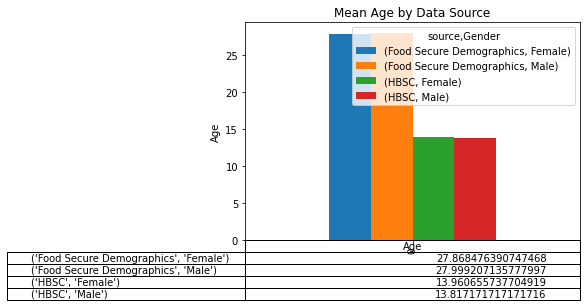

In [77]:
## I now want to vizualize the mean age of the different sources

agePivot.plot.bar(title = "Mean Age by Data Source",
                 table = True,
                 ylabel = 'Age',
                 use_index = False)

In [78]:
## Listing the different variables that I want to examine
variablesList = ['Go to Bed/School Hungry', 'Race', 'Worried food will run out', 'Num Free Lunch']

# I then have to create an empty dictionary for the tables to cross
ExamineTablesDict = {}

# I will now code to create the cross tables I am looking for and then also pull a list of those tables so I can visualize them
for variable in variablesList:
    
# I have to name my table
    tableName = '{}Data'.format(variable) 
    
 # Here I am going to aggregate and examine the data
    table = pd.crosstab(CompleteData[variable], CompleteData['source'], normalize = 'columns')
    ExamineTablesDict[tableName] = table

In [79]:
## this is going to print my results for me so i can look at them before I go to plot them with a data visualization

for key in ExamineTablesDict:
    print(key)
    print(ExamineTablesDict[key])
    print()

Go to Bed/School HungryData
source                       HBSC
Go to Bed/School Hungry          
Always                   0.008850
Never                    0.743363
Often                    0.039823
Sometimes                0.207965

RaceData
source                                     Food Secure Demographics      HBSC
Race                                                                         
American Indian or Alaska Native                           0.000000  0.022222
Asian                                                      0.000000  0.031111
Black or African American                                  0.000000  0.173333
Mexican American                                           0.275126  0.000000
Native Hawaiian or Other Pacific Islander                  0.000000  0.008889
Non-hispanic Black                                         0.261886  0.000000
Non-hispanic White                                         0.379590  0.000000
Other                                                   

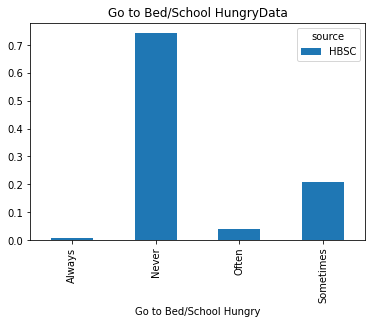

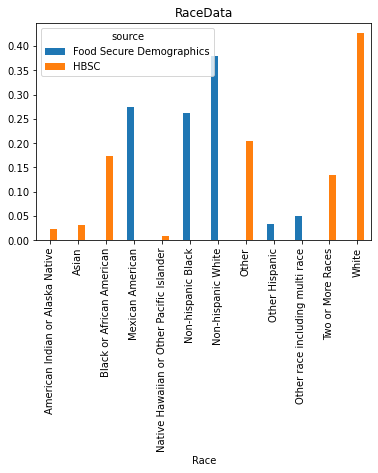

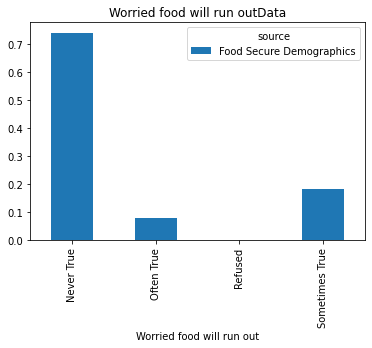

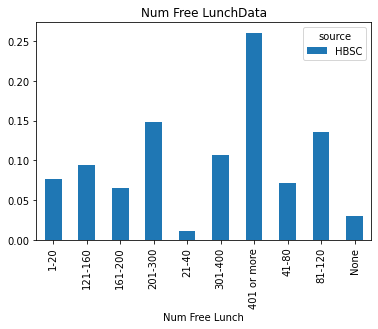

In [80]:
## now for the data visualizations 

for key in ExamineTablesDict:
    data = ExamineTablesDict[key]
    data.plot.bar(title = key)

### Summary

#### After examining the different data that I pulled for this, I believe that my program can be used to identify where there can be an improvement for schools to have better food security for their students or for them to see where they are doing well in reagrds to the amount of lunches they are providing for their students, how many of their students go to bed hungry, etc. I also believe through a deeper data analysis, it can be determined if more education based on nutrition, healthy eating, and exercise should be conducted. There was a lot of data to pull from these sources, and the codebook that I have created can be a stepping stone to better the health of our country starting with the school aged children